# RESEARCH QUESTION: 

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [106]:
#we took the data from https://www.fueleconomy.gov/feg/ws/ 
#we have two dataframe: emissions and vehicles. we need to merge them. 
#first, we open the emissions dataframe dfe
dfe = pd.read_csv('emissions.csv')

In [107]:
#the emissison dataframe has 8 columns of dtypes: float64(2), int64(3), object(3), and 44979 rows
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44979 entries, 0 to 44978
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   efid           44979 non-null  object 
 1   id             44979 non-null  int64  
 2   salesArea      44979 non-null  int64  
 3   score          44979 non-null  float64
 4   scoreAlt       44979 non-null  float64
 5   smartwayScore  44979 non-null  int64  
 6   standard       44979 non-null  object 
 7   stdText        44965 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.7+ MB


In [108]:
#then we open the vehicles dataframe dfv
dfv = pd.read_csv('vehicles.csv')

/var/folders/tw/n9x7cy1x0j3gmy3zhrd1p8640000gn/T/ipykernel_48680/1811012411.py:2: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  dfv = pd.read_csv('vehicles.csv')


In [124]:
#the dfv has 83 columns of dtypes: bool(1), float64(32), int64(27), object(23), and 44768 rows
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44787 entries, 0 to 44786
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        44787 non-null  float64
 1   barrelsA08       44787 non-null  float64
 2   charge120        44787 non-null  float64
 3   charge240        44787 non-null  float64
 4   city08           44787 non-null  int64  
 5   city08U          44787 non-null  float64
 6   cityA08          44787 non-null  int64  
 7   cityA08U         44787 non-null  float64
 8   cityCD           44787 non-null  float64
 9   cityE            44787 non-null  float64
 10  cityUF           44787 non-null  float64
 11  co2              44787 non-null  int64  
 12  co2A             44787 non-null  int64  
 13  co2TailpipeAGpm  44787 non-null  float64
 14  co2TailpipeGpm   44787 non-null  float64
 15  comb08           44787 non-null  int64  
 16  comb08U          44787 non-null  float64
 17  combA08     

In [126]:
# Eliminated all the id duplicate for the dataframe "emission"

dfe = dfe.sort_values('id', ascending=False)
dfe = dfe.drop_duplicates(subset='id', keep='first')

In [127]:
# Eliminated all the id duplicate for the dataframe "vehicles"

dfv = dfv.sort_values('id', ascending=False)
dfv = dfv.drop_duplicates(subset='id', keep='first')

In [128]:
#the dataframes has the same id column, so we are merging the 2 dataframe based on that 
df_raw = pd.merge(left=dfe, right=dfv, left_on='id', right_on='id')

In [129]:
#shape of the new dataframe
df_raw.shape

(21950, 90)

# Data Inspection

As the dataset is very technical and has a lot of column, in the data inspection we are trying to understand the relevance of each column and. 

#GENERAL CHARACTERISTICS: <br>
'make': manufacturer brand <br> 
'model': model name <br> 
'year': production year, from 2009-2018 <br> 

#ENGINE CHARACTERISTICS: <br>
'fuelType' <br>
'cylinders': engine cylinders <br>
'displ': engine displacement in liters<br>
'eng_dscr': <br> 
'phevBlended'<br>
'atvType': type of alternative fuel or advanced technology vehicle <br>

#POLLUTION: <br>
'co2TailpipeAGpm', 'co2TailpipeGpm' <br>
'co2', 'co2A'<br>
'ghgScore', 'ghgScoreA' <br>

#DRIVETRAIN: <br>
'drive': <br>
'trany': <br>
'trans_dscr',<br>

#CHASSIS:   <br>
'VClass': EPA vehicle size class <br>
'pv2': 2-door passenger volume <br>
'pv4': 4-door passenger volume <br>
'lv2': 2 door luggage volume (cubic feet) <br>
'lv4': 4 door luggage volume (cubic feet) <br>
'hlv': hatchback luggage volume (cubic feet) <br>
'hpv': hatchback passenger volume (cubic feet) <br>

#ELECTRONICS: 
'tCharger':
'sCharger': 
'startStop': 

#FUEL CONSUMPTION: <br>
'city08': city MPG for fuelType1 and 2 <br>
'highway08': highway MPG for fuelType1 and 2 <br>




#all the different variable that distinuish between fuelType1 and fuelType2 can be summed up
'barrels08', 'barrelsA08': annual petroleum consumption in barrels<br>
'fuelCost08', 'fuelCostA08'
'comb08',  'combA08'
'city08', 'cityA08'
'highway08', 'highwayA08'


'standard', 
'stdText',
'trans_dscr', 
  
 
#Columns to be deleted:
efid
id
fuelType1: For single fuel vehicles, this will be the only fuel. For dual fuel vehicles, this will be the conventional fuel.
fuelType2: For dual fuel vehicles, this will be the alternative fuel (e.g. E85, Electricity, CNG, LPG). For single fuel vehicles, this field is not used



#Columns to be deleted becasue not relevant for the research:<br>
createdOn - date the vehicle record was created (ISO 8601 format)<br>
modifiedOn - date the vehicle record was last modified (ISO 8601 format)<br>
salesArea - The area of the country where the vehicle can legally be sold.<br>
youSaveSpend - you save/spend over 5 years compared to an average car ($). Savings are positive; a greater amount    
               spent yields a negative number. For dual fuel vehicles, this is the cost savings for gasoline <br>
guzzler - if G or T, this vehicle is subject to the gas guzzler tax <br>
city08U, cityA08U - unrounded city MPG for fuelType1 (same values as city08 but not rounded and some variable are not 
                    available)<br> 
highway08U, highwayA08U - <br>
'highwayCD','highwayE','highwayUF'- <br>
'combinedCD','combE','combinedUF' - <br>
c240Dscr - electric vehicle charger description <br>
charge240b - time to charge an electric vehicle in hours at 240 V using the alternate charger <br> 
c240bDscr - <br>
mfrCode - 3-character manufacturer code <br>
mpgData - has My MPG data <br>
phevBlended - if true, this vehicle operates on a blend of gasoline and electricity in charge depleting mode <br>
'range', 'rangeA', 'rangeCity', 'rangeCityA', 'rangeHwy', 'rangeHwyA' - <br>
'score', 'scoreAlt' - <br>
'UCity', 'UCityA', 'UHighway', 'UHighwayA'- <br>
'phevCity', 'phevHwy', 'phevComb' - <br>
'smartwayScore' - <br>
'charge120' - time to charge an electric vehicle in hours at 120 V <br>
'charge240' - time to charge an electric vehicle in hours at 240 V <br>
'evMotor' - <br>
'feScore' - <br>

In [130]:
#show all columns indeces 
df_raw.columns

Index(['efid', 'id', 'salesArea', 'score', 'scoreAlt', 'smartwayScore',
       'standard', 'stdText', 'barrels08', 'barrelsA08', 'charge120',
       'charge240', 'city08', 'city08U', 'cityA08', 'cityA08U', 'cityCD',
       'cityE', 'cityUF', 'co2', 'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm',
       'comb08', 'comb08U', 'combA08', 'combA08U', 'combE', 'combinedCD',
       'combinedUF', 'cylinders', 'displ', 'drive', 'engId', 'eng_dscr',
       'feScore', 'fuelCost08', 'fuelCostA08', 'fuelType', 'fuelType1',
       'ghgScore', 'ghgScoreA', 'highway08', 'highway08U', 'highwayA08',
       'highwayA08U', 'highwayCD', 'highwayE', 'highwayUF', 'hlv', 'hpv',
       'lv2', 'lv4', 'make', 'model', 'mpgData', 'phevBlended', 'pv2', 'pv4',
       'range', 'rangeCity', 'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany',
       'UCity', 'UCityA', 'UHighway', 'UHighwayA', 'VClass', 'year',
       'youSaveSpend', 'guzzler', 'trans_dscr', 'tCharger', 'sCharger',
       'atvType', 'fuelType2', 'rangeA', 'ev

In [131]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [132]:
display_all(df_raw.describe(include = 'all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
efid,21950,6529,GPRXV04.0C91,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,21950.0,NaN,NaN,NaN,32950.602961,7622.982502,19332.0,25431.5,33824.5,39443.75,45092.0
salesArea,21950.0,NaN,NaN,NaN,5.353121,2.165905,1.0,3.0,7.0,7.0,9.0
score,21950.0,NaN,NaN,NaN,5.033075,1.929742,-12.0,5.0,5.0,6.0,10.0
scoreAlt,21950.0,NaN,NaN,NaN,-0.925194,0.65195,-1.0,-1.0,-1.0,-1.0,6.0
smartwayScore,21950.0,NaN,NaN,NaN,-0.578132,0.857135,-1.0,-1.0,-1.0,-1.0,2.0
standard,21950,48,U2,4066,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stdText,21941,64,LEV-II ULEV,2232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
barrels08,21950.0,NaN,NaN,NaN,14.322039,4.048618,0.047081,11.9004,14.167143,16.528333,33.056667
barrelsA08,21950.0,NaN,NaN,NaN,0.338052,1.280617,0.0,0.0,0.0,0.0,16.528333


In [133]:
df_raw["make"].value_counts()

Chevrolet        1746
BMW              1620
Ford             1449
Mercedes-Benz    1224
Toyota           1065
                 ... 
Rivian              2
Fisker              1
Mahindra            1
Shelby              1
Kandi               1
Name: make, Length: 76, dtype: int64

In [134]:
df_raw["model"].value_counts()

Jetta                    105
Mustang                   98
Camaro                    92
Accord                    78
Tacoma 4WD                65
                        ... 
Titan 4WD PRO-4X           1
RAV4 Hybrid  AWD           1
RS4 Cabriolet              1
AMG GLS63 4matic Plus      1
I-Pace EV400               1
Name: model, Length: 3146, dtype: int64

In [135]:
df_raw["year"].value_counts()

2018    1340
2019    1315
2017    1281
2021    1275
2015    1268
2016    1246
2020    1245
2014    1213
2013    1170
2022    1153
2008    1129
2012    1120
2010    1071
2011    1065
2006    1056
2005    1048
2004    1040
2007     992
2009     923
Name: year, dtype: int64

In [136]:
df_raw["cylinders"].value_counts()

4.0     8143
6.0     7521
8.0     4640
12.0     488
5.0      440
3.0      194
10.0     156
2.0       28
16.0      17
Name: cylinders, dtype: int64

In [137]:
df_raw["displ"].value_counts()

2.0    3264
3.0    2149
3.5    1678
2.5    1378
2.4    1242
       ... 
0.9       6
8.3       6
2.1       5
5.8       2
0.0       1
Name: displ, Length: 62, dtype: int64

In [138]:
df_raw["phevBlended"].value_counts()

False    21752
True       198
Name: phevBlended, dtype: int64

In [139]:
df_raw["pv4"].value_counts()

0      14191
98       463
91       461
94       456
96       445
100      445
90       437
97       428
99       403
102      380
101      316
92       303
105      292
103      287
93       281
108      232
95       232
89       230
106      221
104      215
88       179
86       134
107      127
112       97
109       87
114       79
87        73
84        54
115       45
113       44
111       43
85        36
82        29
110       24
48        22
120       11
148       10
80         9
121        9
125        9
83         9
76         9
143        9
124        9
78         8
79         8
117        7
77         6
128        6
81         6
157        6
70         5
116        5
127        5
75         4
64         3
118        2
72         2
155        2
Name: pv4, dtype: int64

In [140]:
df_raw["pv2"].value_counts()

0      18900
70       294
81       239
84       167
68       165
89       153
83       145
91       132
90       132
82       121
88       117
86       116
78       107
85       107
87       105
94       102
77        98
74        93
79        89
92        78
76        73
93        64
75        45
80        37
72        34
48        32
99        31
52        28
50        22
49        22
100       20
102       18
96        12
97        11
105       10
43         6
98         6
95         5
46         4
64         3
107        2
47         2
118        2
73         1
Name: pv2, dtype: int64

In [141]:
df_raw["drive"].value_counts()

Front-Wheel Drive             6879
Rear-Wheel Drive              6545
All-Wheel Drive               4154
4-Wheel or All-Wheel Drive    2040
4-Wheel Drive                 1942
Part-time 4-Wheel Drive        390
Name: drive, dtype: int64

In [142]:
df_raw["atvType"].value_counts()

FFV               1303
Hybrid             906
Diesel             346
EV                 323
Plug-in Hybrid     255
CNG                 20
Bifuel (CNG)         4
Name: atvType, dtype: int64

In [143]:
df_raw["eng_dscr"].isnull().sum()

11165

In [144]:
df_raw["trans_dscr"].value_counts()

CLKUP              2521
2MODE CLKUP         555
3MODE CLKUP         414
EMS 2MODE CLKUP     293
SIL                 149
EMS                 129
CMODE               115
3MODE                80
2MODE                71
VMODE CLKUP          50
CMODE CLKUP          47
DC/FW                44
6MODE CLKUP          31
4MODE                28
2MODE 2LKUP          27
EMS CLKUP            24
VMODE VLKUP          24
VLKUP                21
CMODE VLKUP          14
SIL EMS               7
6MODE                 6
4MODE CLKUP           6
SIL 2MODE CLKUP       4
SIL 3MODE             3
3MODE VLKUP           2
LONG RATIO            2
EMS 3MODE CLKUP       2
3MODE CLKUP FW        1
SIL 3MODE CLKUP       1
Name: trans_dscr, dtype: int64

In [145]:
df_raw["make"].value_counts()

Chevrolet        1746
BMW              1620
Ford             1449
Mercedes-Benz    1224
Toyota           1065
                 ... 
Rivian              2
Fisker              1
Mahindra            1
Shelby              1
Kandi               1
Name: make, Length: 76, dtype: int64

In [146]:
df_raw["model"].value_counts()

Jetta                    105
Mustang                   98
Camaro                    92
Accord                    78
Tacoma 4WD                65
                        ... 
Titan 4WD PRO-4X           1
RAV4 Hybrid  AWD           1
RS4 Cabriolet              1
AMG GLS63 4matic Plus      1
I-Pace EV400               1
Name: model, Length: 3146, dtype: int64

In [147]:
#fuelType = fuelType1 + fuelType2 
#fuelType1 and fuelType2 can be deleted and the column fuelType can be transformed in a numerical value 
df_raw["fuelType"].value_counts()

Regular                        10338
Premium                         9223
Gasoline or E85                 1188
Diesel                           346
Electricity                      323
Midgrade                         138
Premium and Electricity          122
Premium or E85                   115
Regular Gas and Electricity       76
Premium Gas or Electricity        53
CNG                               20
Regular Gas or Electricity         4
Gasoline or natural gas            4
Name: fuelType, dtype: int64

In [148]:
#For single fuel vehicles, this will be the only fuel. For dual fuel vehicles, this will be the conventional fuel.
df_raw["fuelType1"].value_counts()

Regular Gasoline     11610
Premium Gasoline      9513
Diesel                 346
Electricity            323
Midgrade Gasoline      138
Natural Gas             20
Name: fuelType1, dtype: int64

In [149]:
#For dual fuel vehicles, this will be the alternative fuel (e.g. E85, Electricity, CNG, LPG).
df_raw["fuelType2"].value_counts()

E85            1303
Electricity     255
Natural Gas       4
Name: fuelType2, dtype: int64

In [150]:
#the empty value mean the vehicle only have one type of fuel 
df_raw['fuelType2'].isna().sum()

20388

In [151]:
#electric vehicle charger description
df_raw["c240Dscr"].value_counts()

standard charger    116
3.6 kW charger        4
single charger        3
7.2 kW charger        2
6.6 kW charger        2
Name: c240Dscr, dtype: int64

In [152]:
#time to charge an electric vehicle in hours at 240 V using the alternate charger
df_raw["charge240b"].value_counts()

0.00    21833
4.75       46
8.00       18
8.50       15
3.75        9
8.30        5
6.20        4
9.60        4
5.00        3
8.20        2
4.40        2
6.60        2
6.50        1
5.80        1
9.30        1
2.30        1
7.00        1
2.50        1
4.00        1
Name: charge240b, dtype: int64

In [153]:
df_raw["city08"].value_counts()

18     1956
17     1953
16     1911
19     1731
15     1702
       ... 
61        1
93        1
60        1
67        1
148       1
Name: city08, Length: 124, dtype: int64

In [154]:
#the fuel consumption in the city for fuelType2 is mainly 0 - therefore we are adding up the column 'city08' and 'cityA08'
df_raw["city08"].value_counts()

18     1956
17     1953
16     1911
19     1731
15     1702
       ... 
61        1
93        1
60        1
67        1
148       1
Name: city08, Length: 124, dtype: int64

In [155]:
#EPA 1-10 smog rating for fuelType1
df_raw["score"].value_counts()

 5.0     7491
 6.0     6889
 3.0     2071
 1.0     1732
 7.0     1566
 2.0      974
 9.0      646
 10.0     320
 8.0      242
-12.0      11
 4.0        5
-2.0        3
Name: score, dtype: int64

In [156]:
#EPA 1-10 smog rating for fuelType2
df_raw["scoreAlt"].value_counts()

-1.0    21623
 5.0      117
 6.0       90
 2.0       70
 1.0       50
Name: scoreAlt, dtype: int64

In [157]:
df_raw["VClass"].value_counts()

Midsize Cars                          2991
Compact Cars                          2880
Subcompact Cars                       2000
Large Cars                            1653
Sport Utility Vehicle - 4WD           1413
Two Seaters                           1348
Small Sport Utility Vehicle 4WD       1331
Sport Utility Vehicle - 2WD           1111
Standard Sport Utility Vehicle 4WD    1054
Minicompact Cars                       892
Small Station Wagons                   850
Standard Pickup Trucks 4WD             825
Small Sport Utility Vehicle 2WD        823
Standard Pickup Trucks 2WD             797
Standard Sport Utility Vehicle 2WD     391
Small Pickup Trucks 2WD                282
Midsize Station Wagons                 245
Minivan - 2WD                          244
Small Pickup Trucks 4WD                229
Vans, Cargo Type                       192
Special Purpose Vehicle 2WD            170
Vans, Passenger Type                   159
Special Purpose Vehicle 4WD             37
Minivan - 4

# Data Cleaning

Based on the data inspection part we are going to eliminate ...... 

In [158]:
df = df_raw

In [159]:
# Removed the column previously cited in the data inspection 

df = df.drop(["createdOn", "efid","id", "fuelType1", "fuelType2", "createdOn", "modifiedOn", "salesArea", "youSaveSpend", "guzzler", "city08U", "cityA08U", "highway08U", "highwayA08U", "highwayCD", "highwayE", "highwayUF", "combinedCD", "combE", "combinedUF", "c240Dscr", "charge240b", "c240bDscr", "mfrCode", "mpgData", "phevBlended", "range", "rangeA", "rangeCity", "rangeCityA", "rangeHwy", "rangeHwyA", "score", "scoreAlt", "UCity", "UCityA", "UHighway", "UHighwayA", "phevCity", "phevHwy", "phevComb", "smartwayScore", "charge120", "evMotor", "feScore", "cityCD", "cityE", "cityUF", "comb08U", "combA08U", "fuelCost08", "fuelCostA08"], axis = 1)

In [160]:
df.shape

(21950, 39)

In [161]:
df.columns

Index(['standard', 'stdText', 'barrels08', 'barrelsA08', 'charge240', 'city08',
       'cityA08', 'co2', 'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08',
       'combA08', 'cylinders', 'displ', 'drive', 'engId', 'eng_dscr',
       'fuelType', 'ghgScore', 'ghgScoreA', 'highway08', 'highwayA08', 'hlv',
       'hpv', 'lv2', 'lv4', 'make', 'model', 'pv2', 'pv4', 'trany', 'VClass',
       'year', 'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'startStop'],
      dtype='object')

In [162]:
# Create a new column " Barrels " with the sum of "barrels08" and "barrelsA08"

df['Barrels'] = df['barrels08'] + df['barrelsA08'] 

In [164]:
# Create a new column " City " with the sum of "city08" and "cityA08"

df['City'] = df['city08'] + df['cityA08']

In [166]:
# Create a new column " Co2 " with the sum of "co2" and "co2A"

df['Co2'] = df['co2'] + df['co2A']

In [167]:
# Create a new column " co2TailpipeGpm " with the sum of "co2TailpipeAGpm" and "co2TailpipeGpm"

df['co2TailpipeGpm'] = df['co2TailpipeAGpm'] + df['co2TailpipeGpm']

In [168]:
# Create a new column " Comb " with the sum of "comb08" and "combA08"

df['Comb08'] = df['comb08'] + df['combA08']

In [169]:
# Create a new column " Highway " with the sum of "highway08 " and "highwayA08"

df['Highway'] = df['highway08'] + df['highwayA08']

In [170]:
# Removed all the columns summed and left the aggregate ones 

df = df.drop(["barrels08", "barrelsA08", "city08","cityA08", "co2", "co2A", "co2TailpipeAGpm", "co2TailpipeGpm", "comb08", "combA08", "highway08", "highwayA08"], axis = 1)

In [171]:
# Merge the columns "tCharger" and "sCharger"

df['Charger']= df['tCharger'].fillna('0') + ' ' + df['sCharger'].fillna('0')

In [172]:
df

,standard,stdText,charge240,cylinders,displ,drive,engId,eng_dscr,fuelType,ghgScore,...,tCharger,sCharger,atvType,startStop,Barrels,City,Co2,Comb08,Highway,Charger
0,T3B30,Federal Tier 3 Bin 30,0.0,6.0,3.0,4-Wheel Drive,774,SIDI; Mild Hybrid,Premium,5,...,NaN,NaN,Hybrid,Y,13.523182,19,407,22,26,0 0
1,T3B160,Federal Tier 3 Bin 160,0.0,6.0,3.5,Rear-Wheel Drive,65,SIDI & PFI; FFV,Gasoline or E85,3,...,NaN,NaN,FFV,N,22.823088,26,1046,29,34,0 0
2,T3B160,Federal Tier 3 Bin 160,0.0,6.0,3.5,All-Wheel Drive,64,SIDI & PFI; FFV,Gasoline or E85,3,...,NaN,NaN,FFV,N,23.916875,25,1089,28,32,0 0
3,T3B125,Federal Tier 3 Bin 125,0.0,4.0,2.0,All-Wheel Drive,245,SIDI,Premium,5,...,T,NaN,NaN,Y,13.523182,19,408,22,25,T 0
4,T3B125,Federal Tier 3 Bin 125,0.0,4.0,2.0,All-Wheel Drive,210,SIDI,Premium,5,...,T,NaN,NaN,Y,12.935217,20,391,23,28,T 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21945,B9,BIN 9,0.0,6.0,3.2,4-Wheel or All-Wheel Drive,0,NaN,Premium,-1,...,NaN,NaN,NaN,NaN,14.167143,19,-2,21,25,0 0
21946,B9,BIN 9,0.0,4.0,1.8,4-Wheel or All-Wheel Drive,0,NaN,Premium,-1,...,T,NaN,NaN,NaN,14.167143,18,-2,21,26,T 0
21947,B9,BIN 9,0.0,4.0,1.8,Front-Wheel Drive,0,NaN,Premium,-1,...,T,NaN,NaN,NaN,14.167143,18,-2,21,26,T 0
21948,B9,BIN 9,0.0,6.0,3.2,Rear-Wheel Drive,0,DOHC,Premium,-1,...,NaN,NaN,NaN,NaN,16.528333,16,-2,18,22,0 0


In [173]:
# Removed the columns summed 

df = df.drop(["tCharger", "sCharger"], axis = 1)

In [174]:
# Rewrite the string in a better format 

df["Charger"] = df["Charger"].apply({'0 0':0, 'T 0': "T",'0 S': "S",'T S': "TS"  }.get)

In [175]:
df['Charger'].value_counts() 

0     14351
T      6842
S       674
TS       83
Name: Charger, dtype: int64

# Data Visualization

scatterplot <br>
boxplot <br>
countplot <br>

https://seaborn.pydata.org/tutorial/function_overview.html 

<Figure size 2160x2160 with 0 Axes>

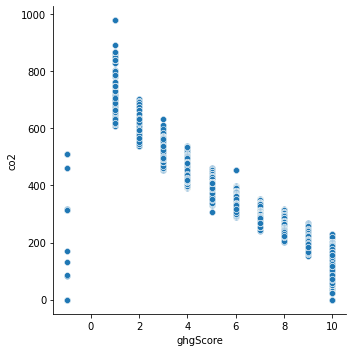

In [95]:
plt.figure(figsize=(30,30))
sns.relplot(data=df_raw, x="ghgScore", y="co2")
plt.show()

/var/folders/tw/n9x7cy1x0j3gmy3zhrd1p8640000gn/T/ipykernel_48680/4243178429.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


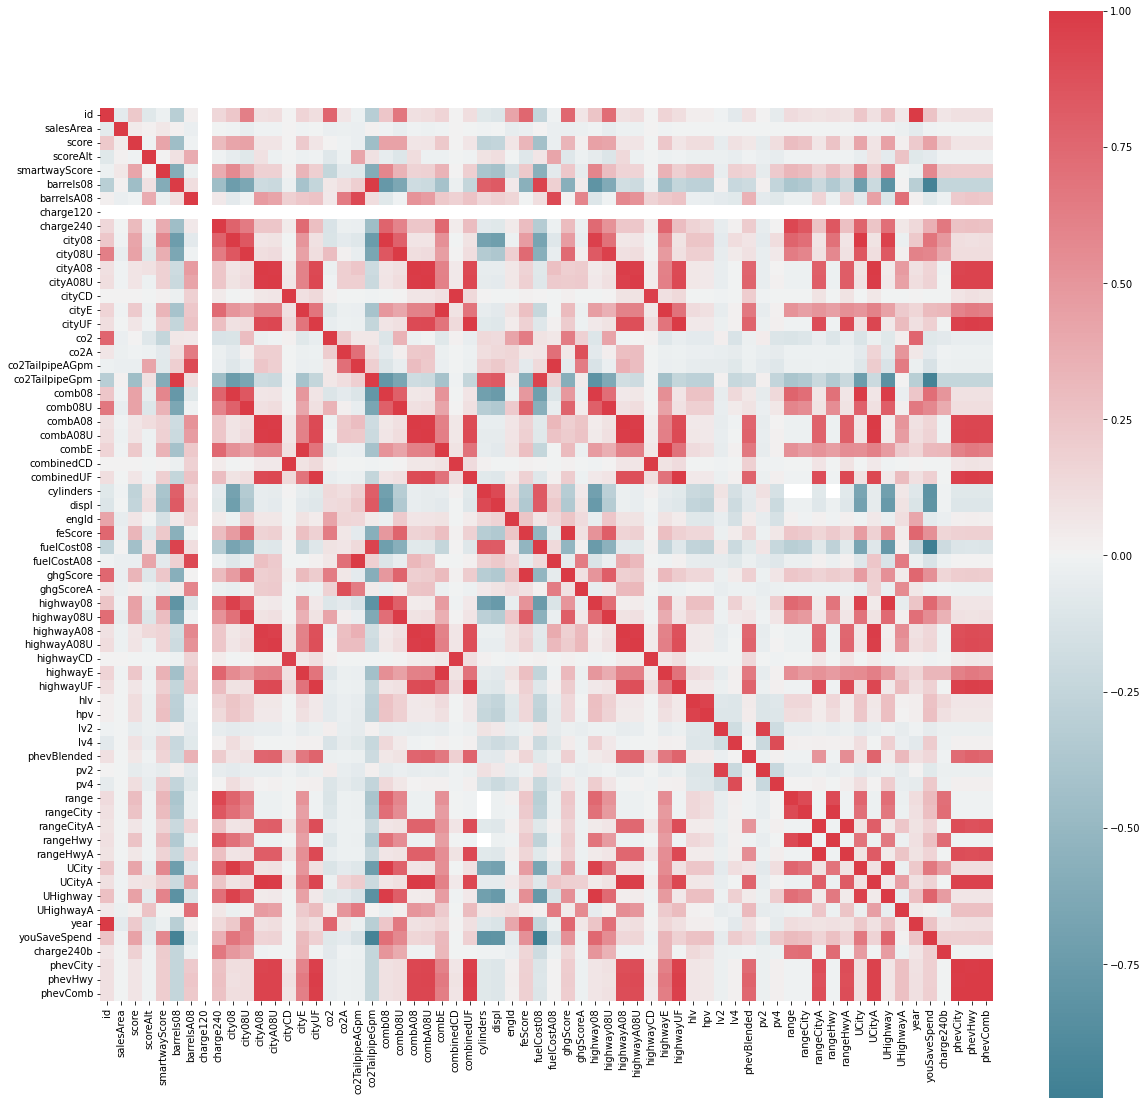

In [82]:
plt.figure(figsize=(20,20))
corr = df_raw.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)
plt.show()

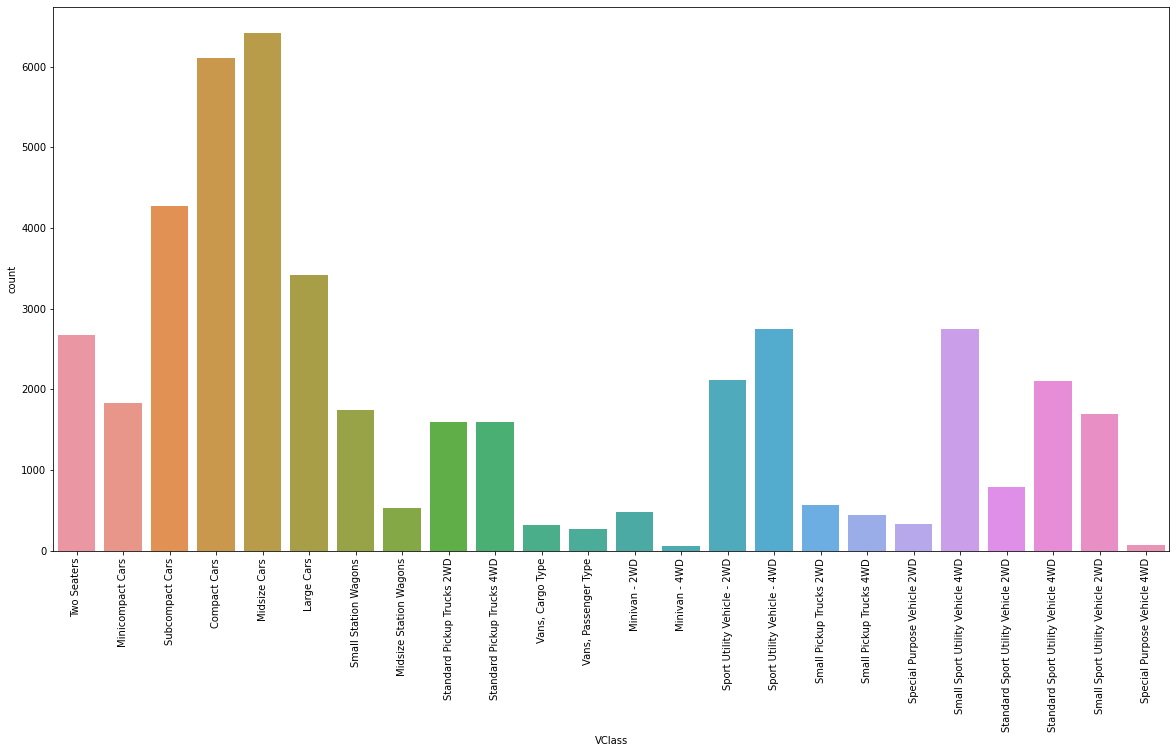

In [71]:
plt.figure(figsize=(20,10))
sns.countplot(data = df_raw, x = "VClass")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data = df_raw, x = "")
plt.xticks(rotation=90)
plt.show()